In [1]:
from CNN_hp import *

In [2]:
# Documentation variables
name = 'CNN_hp'
model_path = f'../models/{name}.keras'
data_path = '../data/LaFleur_supp.csv'

# Hyperparameter tuning variables
max_trials = 30

# Unoptimized training Hyperparameters
loss = 'mean_squared_error'
epochs = 100
batch_size = 32

# Hyperparameter ranges dictionary
hyperparam_ranges = {
    'num_layers': (1, 3),
    'filters': [32, 64, 128],
    'kernel_size': [3, 4, 5],
    'strides': [1, 2],
    'pool_size': [2, 3],
    'activation': ['relu', 'tanh'],
    'dense_units': (32, 128, 32),
    'learning_rate': (1e-4, 1e-2)
}

In [3]:
X, y = load_features(data_path)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# # Perform Bayesian Optimization
# best_model, best_hyperparams = train_best_model(name, X_train, y_train, X_test, y_test,
#                                 X_train.shape[1:], loss, max_trials, epochs, batch_size, hyperparam_ranges)

# # Save the best model
# best_model.save(model_path)

# # print the best hyperparameters
# for key, value in best_hyperparams.values.items():
#     print(f"{key}: {value}")

In [9]:
model = load_model(model_path)
y_pred = model.predict(X_test)
y_test = y_test.values

305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
mse, rmse, mae, r2 = calc_metrics(y_test, y_pred)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('MAE: ', mae)
print('R2: ', r2)

MSE:  0.002255467814768027
RMSE:  0.04749176575752924
MAE:  0.030994588831665393
R2:  0.8804957288120185


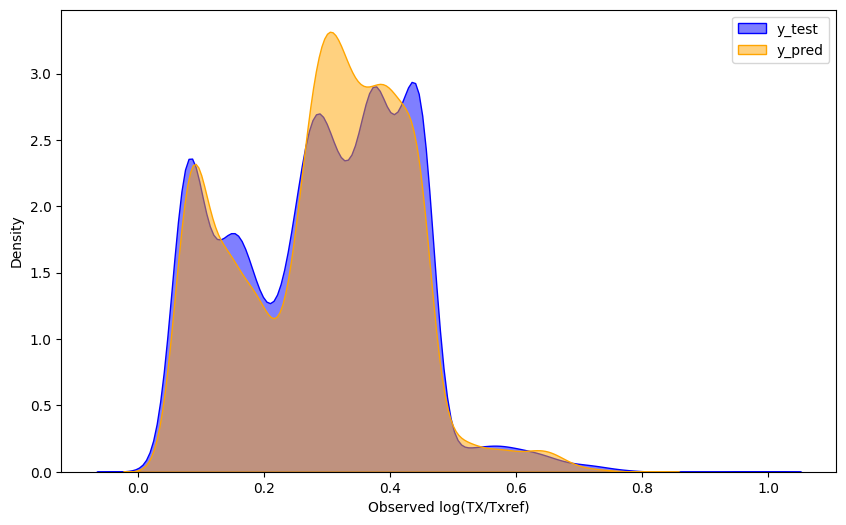

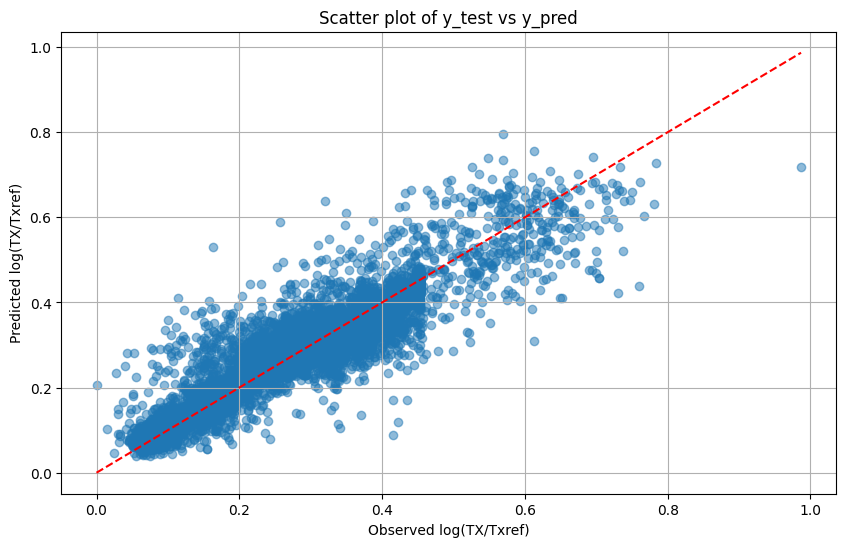

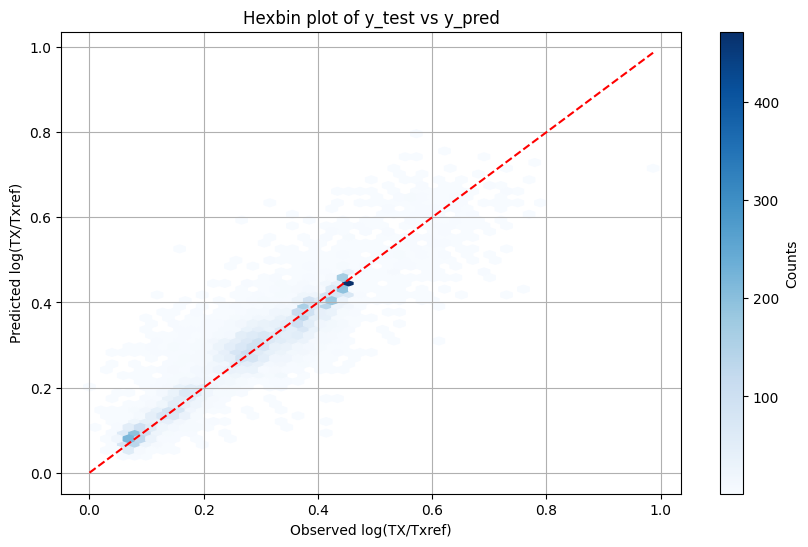

In [11]:
plot_kde(y_test, y_pred)
plot_scatter(y_test, y_pred)
plot_hexbin(y_test, y_pred)